In [173]:
import numpy as np 
import pandas as pd 
import sklearn 
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt 
from sklearn import model_selection 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 

In [174]:
df=pd.read_csv(r"C:\Users\Dokhy\Desktop\IRIS.csv")

In [175]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [176]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [177]:
# kl=pd.DataFrame(data=np.c_[df['data'],df['target']],columns=df)

In [178]:
cv.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [179]:
cv.shape

(150, 5)

In [180]:
cv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [181]:
import seaborn as sns

<AxesSubplot:xlabel='species', ylabel='count'>

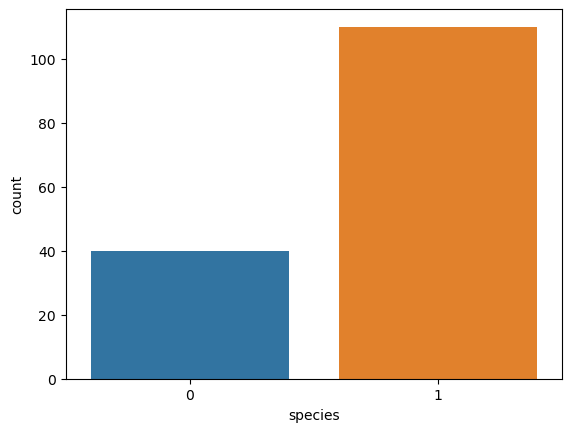

In [205]:
sns.countplot(x='species', data=df)

<AxesSubplot:xlabel='petal_length', ylabel='count'>

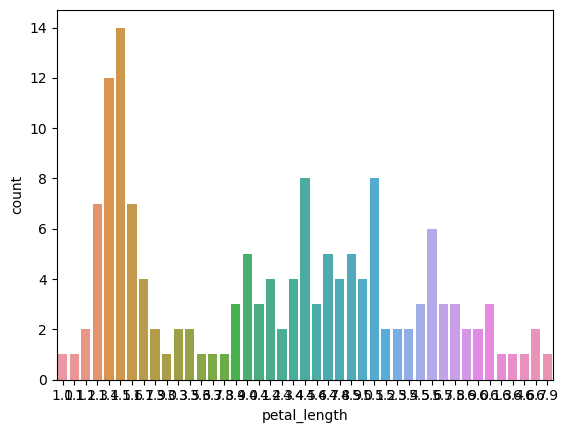

In [185]:
sns.countplot(x='petal_length', data=df)

In [186]:
cv.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [187]:
le = preprocessing.LabelEncoder() 

In [188]:
df.species = le.fit_transform(df.species)

In [189]:
df


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


In [190]:
X = df.iloc[:,0:4]
X[0:10]

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [191]:
y = df.iloc[:,-1]
y[0:10]

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    1
Name: species, dtype: int32

In [192]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0) #80/20 split

In [193]:
X_train.shape, y_train.shape

((112, 4), (112,))

In [194]:
X_test.shape, y_test.shape

((38, 4), (38,))

In [195]:
nb_classifier = GaussianNB()

In [196]:
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [197]:
nb_predicted = nb_classifier.predict(X_test)

In [198]:
nb_accuracy = accuracy_score(y_test, nb_predicted)
nb_precision = precision_score(y_test, nb_predicted)
nb_recall = recall_score(y_test, nb_predicted)
nb_f1_score = f1_score(y_test, nb_predicted)

In [199]:
knn_classifier = KNeighborsClassifier()

In [200]:
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [206]:
knn_predicted = knn_classifier.predict(X_test)

C:\Users\Dokhy\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [207]:
knn_accuracy = accuracy_score(y_test, knn_predicted)
knn_precision = precision_score(y_test, knn_predicted)
knn_recall = recall_score(y_test, knn_predicted)
knn_f1_score = f1_score(y_test, knn_predicted)

In [203]:
print('Naive Bayes: Accuracy:', nb_accuracy, 'Precision:', nb_precision, 'Recall:', nb_recall, 'F1-score:', nb_f1_score)
print('KNN: Accuracy:', knn_accuracy, 'Precision:', knn_precision, 'Recall:', knn_recall, 'F1-score:', knn_f1_score)

Naive Bayes: Accuracy: 0.7368421052631579 Precision: 0.8333333333333334 Recall: 0.8333333333333334 F1-score: 0.8333333333333334
KNN: Accuracy: 0.7105263157894737 Precision: 0.8275862068965517 Recall: 0.8 F1-score: 0.8135593220338982


In [204]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
report = classification_report(nb_predicted, knn_predicted)
print(report)

              precision    recall  f1-score   support

           0       0.44      0.50      0.47         8
           1       0.86      0.83      0.85        30

    accuracy                           0.76        38
   macro avg       0.65      0.67      0.66        38
weighted avg       0.77      0.76      0.77        38

